In [6]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)


<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\sc_AHM.py'>

In [7]:

Us = np.linspace(0.00001,15, 50)

sc_dic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'convsfw': [], 'SFW_ten':[], 'SFWxx':[], 'SFWxy':[], 'delta0':[],'delta1':[], 'ns0':[],'ns1':[], 'deltaError':[], 'nError':[]}

for Uv in Us:
    ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5], nu=3, U=[Uv,Uv], mu=[-1,-1])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham,nk=21,HF=True, alpha=0.3, Nmin=10, Nmax=1200)
    
    print('sc ', Uv)
    nu_test = np.sum(ham.striped_props()[2])

    sfws, sdsfw = sf.detSFW(ham,nk=21)
    conv = sf.SFWconv(ham,nk=21)[0]

    sc_dic['sq_det_SFW'].append(sdsfw)
    sc_dic['SFW_ten'].append(sfws)
    sc_dic['SFWxx'].append(sfws[0,0])
    sc_dic['SFWxy'].append(sfws[0,1])

    sc_dic['convsfw'].append(conv)

    sc_dic['U'].append(Uv)
    sc_dic['mu'].append(ham.mu[0])
    sc_dic['nu'].append(nu_test)
    sc_dic['delta0'].append(dels[0,-1])
    sc_dic['delta1'].append(dels[1,-1])
    sc_dic['ns0'].append(nus[0,-1])
    sc_dic['ns1'].append(nus[1,-1])
    sc_dic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
    sc_dic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
    
    print('U, nu, sfw', Uv, nu_test, sfws)

sc_df = pd.DataFrame.from_dict(sc_dic)




sc  1e-05
U, nu, sfw 1e-05 (2.999258120741309+8.156603992652942e-34j) [[ 2.81723533e-06+1.69996583e-23j -7.14540860e-18+4.98951238e-34j]
 [-7.30275314e-18+7.14690330e-34j  2.81723533e-06+1.69996583e-23j]]
sc  0.3061322448979592
U, nu, sfw 0.3061322448979592 (3.0004472519696543-6.164368080493769e-29j) [[7.22107194e-02+4.29923977e-19j 9.88861220e-18+4.71110414e-33j]
 [1.13125802e-17+4.77704868e-33j 7.22107194e-02+4.29923977e-19j]]
sc  0.6122544897959183
U, nu, sfw 0.6122544897959183 (2.9992305577655323+1.4080053999899537e-33j) [[ 1.28526373e-01+7.58713897e-19j -6.04596368e-18+6.60340674e-33j]
 [-6.80220084e-18+6.39290827e-33j  1.28526373e-01+7.58713897e-19j]]
sc  0.9183767346938775
U, nu, sfw 0.9183767346938775 (2.9992139538464686+7.257203719335363e-33j) [[1.75566888e-01+1.02798901e-18j 1.20516078e-18+1.05467592e-34j]
 [2.90399004e-18-7.59890726e-35j 1.75566888e-01+1.02798901e-18j]]
sc  1.2244989795918368
U, nu, sfw 1.2244989795918368 (2.999110545079996-6.801654797823403e-34j) [[ 2.14867

In [8]:
SFWdf = pd.DataFrame.from_dict(sc_dic)

In [9]:
SFWdf

,U,mu,nu,sq_det_SFW,convsfw,SFW_ten,SFWxx,SFWxy,delta0,delta1,ns0,ns1,deltaError,nError
0,0.000010,-0.000005-0.000000j,2.999258+0.000000j,0.000003+0.000000j,2.042520e-12-3.522130e- 55j,[[(2.8172353314220374e-06+1.6999658280652624e-...,0.000003+0.000000j,-7.145409e-18+4.989512e- 34j,3.941423e-07+8.751402e- 33j,0.250000+0.000000j,1.000000-0.000000j,0.999629+0.000000j,4.978732e-08,0.000095
1,0.306132,-0.153070+0.000000j,3.000447-0.000000j,0.072211+0.000000j,2.131059e-03-1.966641e- 51j,"[[(0.0722107194404033+4.299239767605871e-19j),...",0.072211+0.000000j,9.888612e-18+4.711104e- 33j,1.298125e-02+2.856177e- 36j,0.256491+0.000000j,0.999980-0.000000j,1.000233+0.000000j,7.419961e-07,0.000061
2,0.612254,-0.306090+0.000000j,2.999231+0.000000j,0.128526+0.000000j,8.679414e-03+9.243952e- 51j,[[(0.12852637340174325+7.587138972809976e-19j)...,0.128526+0.000000j,-6.045964e-18+6.603407e- 33j,2.794621e-02-5.883853e- 35j,0.263973+0.000000j,1.000064+0.000000j,0.999583+0.000000j,5.868555e-08,0.000103
3,0.918377,-0.459132-0.000000j,2.999214+0.000000j,0.175567+0.000000j,1.820185e-02-1.409186e- 50j,"[[(0.175566887960917+1.0279890103305896e-18j),...",0.175567+0.000000j,1.205161e-18+1.054676e- 34j,4.509628e-02+3.520925e- 34j,0.272548-0.000000j,1.000109+0.000000j,0.999553-0.000000j,6.313127e-08,0.000106
4,1.224499,-0.612163+0.000000j,2.999111-0.000000j,0.214868+0.000000j,2.848913e-02+3.223867e- 50j,[[(0.21486750746635616+1.2477733239294467e-18j...,0.214868+0.000000j,-1.546943e-17-4.111708e- 34j,6.461640e-02-2.188813e- 34j,0.282308-0.000000j,1.000181-0.000000j,0.999465-0.000000j,8.228225e-08,0.000119
5,1.530621,-0.765190-0.000000j,2.999007+0.000000j,0.247653+0.000000j,3.852238e-02+4.891339e- 50j,[[(0.24765303716406017+1.430041242765953e-18j)...,0.247653+0.000000j,-1.892068e-18-7.190575e- 34j,8.666074e-02+9.689767e- 35j,0.293330+0.000000j,1.000277-0.000000j,0.999365+0.000000j,1.024111e-07,0.000131
6,1.836743,-0.918205-0.000000j,2.998865+0.000000j,0.275146+0.000000j,4.832677e-02-1.031670e- 49j,"[[(0.2751464290855982+1.590058229204194e-18j),...",0.275146+0.000000j,-5.475098e-18-8.705989e- 34j,1.112524e-01+4.682616e- 34j,0.305626+0.000000j,1.000416+0.000000j,0.999225+0.000000j,1.311162e-07,0.000145
7,2.142866,-1.071204+0.000000j,2.998676+0.000000j,0.297908+0.000000j,5.795943e-02+5.354471e- 50j,[[(0.29790770181568504+1.7388847890284786e-18j...,0.297908+0.000000j,1.070779e-17-9.182013e- 34j,1.381465e-01-8.636857e- 34j,0.319073-0.000000j,1.000616+0.000000j,0.999030-0.000000j,1.728765e-07,0.000163
8,2.448988,-1.224214+0.000000j,2.998590-0.000000j,0.315877+0.000000j,6.715348e-02-5.091393e- 50j,[[(0.3158766414743026+1.8797858009435798e-18j)...,0.315877+0.000000j,1.348738e-18+1.216371e- 33j,1.667406e-01+1.425472e- 34j,0.333370+0.000000j,1.000813-0.000000j,0.998888+0.000000j,1.889797e-07,0.000166
9,2.755110,-1.377214+0.000000j,2.998478+0.000000j,0.328827+0.000000j,7.546427e-02+1.903384e- 50j,[[(0.3288265482643046+2.0090225396791065e-18j)...,0.328827+0.000000j,5.196795e-18+1.401867e- 34j,1.961010e-01-9.377899e- 35j,0.348050+0.000000j,1.001067+0.000000j,0.998706-0.000000j,2.125926e-07,0.000170


In [10]:
SFWdf.to_csv('sfw_scmu_50U_0-15_nu_eq_3')

In [126]:
n=3
d = SFWdf.delta.iloc[n]
ns = SFWdf.ns.iloc[n]
Uv = SFWdf.U.iloc[n]
m = SFWdf.mu.iloc[n]
nu = SFWdf.nu.iloc[n]


In [31]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])


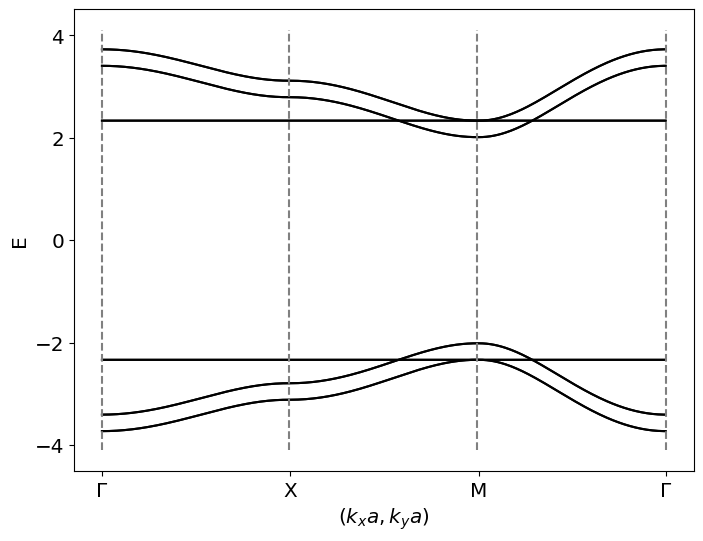

In [32]:
ham.plot_bands()

In [86]:
sfwtab_1 = pd.read_csv(r'sfw_scmu_10U_0-3_nu_eq_3', index_col=0)
sfwtab_1

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.001000,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(2.0869959256948913+5.0612203823638e-19j),[-2.08699594e+00-1.08034290e-18j 2.46342089e-...,[ 2.46342089e-04-1.37995872e-19j -2.08699594e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-2.0869959402335976-1.080342899881003e-18j),(0.0002463420890672682-1.3799587175375357e-19j)
1,0.334222,(-0.1670536281258514+5.342896739276391e-21j),(2.998082472032473-2.4338357651418266e-19j),(0.20729625221987066+1.1996873502222309e-18j),[-0.21586395-1.44750492e-18j 0.06021219+8.309...,[ 0.06021219+8.30944876e-19j -0.21586395-1.320...,[(0.016209520399599345+1.6523066034928748e-19j...,"[(1.0001523962344394+3.9336683499313177e-22j),...",2.249872e-07,0.000109,(-0.21586394789646124-1.4475049179507481e-18j),(0.06021218993725808+8.309448761303099e-19j)
2,0.667444,(-0.33359952201047194+3.659494579639856e-21j),(2.997935720144892-1.3204024571697615e-19j),(0.27905440740894905+1.801224937368322e-19j),[-0.2943999 -1.44561331e-18j 0.09380799+7.993...,[ 0.09380799+7.99385342e-19j -0.2943999 +5.947...,"[(0.03362825606166449+9.120886015456396e-21j),...","[(1.0002550762878484-6.212278821501623e-21j), ...",1.247976e-07,0.000117,(-0.294399899355937-1.4456133143962643e-18j),(0.0938079871142421+7.993853420272534e-19j)
3,1.000667,(-0.500141372102053+1.1384925767701415e-20j),(2.9978279889286314-1.0616086033107087e-19j),(0.34872161136101437+1.0422249793258574e-18j),[-0.36670703+1.49112532e-19j 0.11343404+1.056...,[ 0.11343404+1.05626294e-18j -0.36670703-2.784...,[(0.053750531341223685-6.550616443576443e-20j)...,"[(1.0004105992614192-1.0725262946414952e-20j),...",5.808863e-07,0.000123,(-0.36670702804013205+1.4911253234749336e-19j),(0.11343404331954067+1.0562629431939354e-18j)
4,1.333889,(-0.666666205271484-4.4091591986218895e-21j),(2.997618664571199+5.675195694735282e-20j),(0.4107128088683177+1.757067651423552e-19j),[-0.4290532 -1.08146169e-18j 0.12410334+9.350...,[ 0.12410334+9.35065232e-19j -0.4290532 +2.041...,"[(0.07678573788529808-4.796497335242036e-21j),...","[(1.0006400306972558+4.846239492376816e-20j), ...",2.433881e-06,0.000133,(-0.42905320243487327-1.0814616898616877e-18j),(0.12410334061221759+9.350652317139577e-19j)
5,1.667111,(-0.8331593075491678-1.882871986632883e-20j),(2.9972655570874336+1.2953854106852917e-19j),(0.4655047288339459+1.503997766519397e-18j),[-0.48276494-1.70210799e-18j 0.12793487+9.767...,[ 0.12793487+9.76743854e-19j -0.48276494-1.716...,[(0.10284540264713424-6.3604915109840756e-21j)...,"[(1.000988528110796+2.2528567199640843e-20j), ...",8.443498e-06,0.000148,(-0.48276493561359135-1.7021079915447424e-18j),(0.12793486816041433+9.767438540961293e-19j)
6,2.000333,(-0.9996284552438277+1.9416044911919895e-20j),(2.996883396865896-9.347423760292702e-20j),(0.5127186424551564+1.6321654505186689e-18j),[-0.52801141-3.33498863e-18j 0.12615723+8.242...,[ 0.12615723+8.24281364e-19j -0.52801141-2.286...,"[(0.1317579054981698+4.451549361640573e-22j), ...","[(1.0014576068517942+1.706795958707076e-20j), ...",2.638842e-05,0.000163,(-0.5280114132007423-3.3349886331092585e-18j),(0.12615722789118275+8.242813639430251e-19j)
7,2.333556,(-1.1660934440671564-8.080506315936667e-21j),(2.9965843169901385+4.7864211467860814e-20j),(0.5512892893850049+2.983736889716054e-18j),[-0.56416793-3.77884695e-18j 0.11985648+8.921...,[ 0.11985648+8.92129551e-19j -0.56416793-2.431...,"[(0.1629409529138118-1.2675264339311441e-19j),...","[(1.0020048605541056+6.932566768009252e-22j), ...",7.642690e-05,0.000170,(-0.5641679330739313-3.77884695212444e-18j),(0.11985648133613394+8.921295509385545e-19j)
8,2.666778,(-1.3326341869699307+3.4002121119301665e-20j),(2.996691448888708-1.7021703115694834e-19j),(0.5800250873584806+2.8228993683400964e-18j),[-0.59041638-2.56512686e-18j 0.11028325+1.452...,[ 0.11028325+1.45246141e-19j -0.59041638

In [97]:
n=3
d =sfwtab_1.delta.iloc[n]
ns =sfwtab_1.ns.iloc[n]
mu = sfwtab_1.mu.iloc[n]
nu =sfwtab_1.nu.iloc[n]
Uv = sfwtab_1.U.iloc[n]


In [98]:
m= complex(mu)
nu = complex(nu)

In [99]:
ns=list(literal_eval(ns[1:-1]))
d=list(literal_eval(d[1:-1]))

In [100]:
d

[(0.053750531341223685-6.550616443576443e-20j),
 (0.27687465705030206+3.4400784572571072e-18j)]

In [106]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])
ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5],nu=3, U=[1,1], mu=[0.1,0.1])


In [107]:
nu

(2.9978279889286314-1.0616086033107087e-19j)

In [108]:
ham.Deltra(50,HF=True, alpha=0.7, Nmin=10, Nmax=1300)

(array([[1.        +0.00000000e+00j, 0.77472966-5.33944281e-20j,
         0.6048314 +3.56750231e-20j, 0.47611711-1.72665808e-19j,
         0.37810968-8.22258596e-20j, 0.30316893-7.81050759e-20j,
         0.24568614-4.90302465e-20j, 0.20149673+5.43479893e-20j,
         0.16747553+5.63404398e-20j, 0.14125731+7.48380872e-20j,
         0.12104056+3.97584402e-20j, 0.10544668+3.07535881e-20j,
         0.09341724+1.48869765e-20j, 0.08413774+2.36095166e-20j,
         0.07698039+8.41565823e-21j, 0.0714609 -4.31002782e-20j,
         0.06720541+1.27862769e-20j, 0.06392526-3.81226487e-20j,
         0.06139756-5.79334353e-20j, 0.0594502 -9.63404371e-20j,
         0.05795031-3.96864266e-20j, 0.05679536-5.36964375e-20j,
         0.05590622-1.69696972e-20j, 0.05522187-5.10867068e-20j,
         0.05469525-4.11175291e-20j, 0.05429008-3.00205716e-20j,
         0.05397841-8.32156953e-21j, 0.0537387 -2.31905100e-20j,
         0.05355437-3.10539402e-20j, 0.05341264-2.86373394e-20j,
         0.05330369-5.209

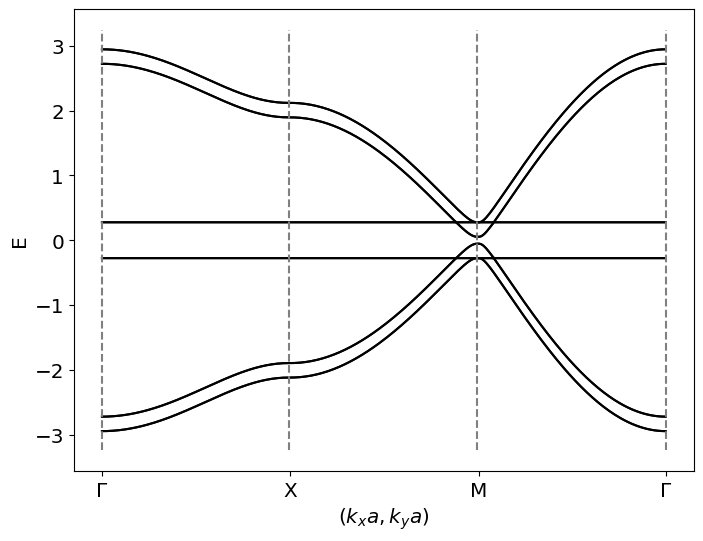

In [109]:
ham.plot_bands()

In [110]:
sdsfwlist = []
for it in range (60,100,10):
    sfws, sdsfw = ham.detSFW(it)
    sdsfwlist.append(sdsfw)
    print(sfws)


[[-4.45369376e-01-1.57643439e-18j -3.79200914e-17+2.36823526e-19j]
 [-3.60697197e-17+2.36823526e-19j -4.45369376e-01+6.57351079e-19j]]


KeyboardInterrupt: 

In [67]:
sdsfwlist

[(0.39711827559663554+2.4220413511566768e-18j),
 (0.3638422493748509-2.3613696123165877e-18j),
 (0.34872161136101437+1.0422249793258574e-18j),
 (0.33997162722756824+9.921755781194246e-19j),
 (0.33426235773986934-2.4785384360116367e-18j),
 (0.33024491450517185-4.791413846997925e-19j),
 (0.3272651774664694-5.449448650420194e-19j),
 (0.32496747538268994-2.6781712188633753e-20j)]

In [74]:
sfws

array([[6.45476684e-01+4.57388841e-19j, 5.35595873e-18-1.54128749e-19j],
       [6.88251539e-18-1.54128749e-19j, 6.45476684e-01+5.95792996e-19j]])

In [ ]:
np.sqrt(np.linalg.det(ten))